In [8]:
import yaml

In [6]:
price_path = r"Portfolio and Trade book\price_his.yml"
tickers = 'product_1'
price = 12
list1 = []

ConstructorError: could not determine a constructor for the tag 'tag:yaml.org,2002:python/object/apply:numpy.core.multiarray.scalar'
  in "Portfolio and Trade book\price_his.yml", line 2, column 6

In [19]:
cur_yaml

{'IBM': 1, 'akk': {1: 1}}

In [23]:
with open(price_path, 'r') as yamlfile:
    cur_yaml = yaml.safe_load(yamlfile)
    cur_yaml[tickers].append(price)
    list1 = cur_yaml
with open(price_path, 'w') as yaml_file:
    yaml.dump(list1, yaml_file, default_flow_style=False)

In [21]:
cur_yaml

{'product_1': [12]}

In [ ]:
from datetime import datetime
import backtrader as bt

class SmaCross(bt.SignalStrategy):
    def __init__(self):
        sma1, sma2 = bt.ind.SMA(period=10), bt.ind.SMA(period=30)
        crossover = bt.ind.CrossOver(sma1, sma2)
        self.signal_add(bt.SIGNAL_LONG, crossover)

cerebro = bt.Cerebro()
cerebro.addstrategy(SmaCross)

data0 = bt.feeds.YahooFinanceData(dataname='MSFT', fromdate=datetime(2011, 1, 1),
                                  todate=datetime(2012, 12, 31))
cerebro.adddata(data0)

cerebro.run()
cerebro.plot()

In [3]:
import pandas as pd
import numpy as np
import os

In [4]:
os.chdir(r"C:\Users\24395\Downloads\khypqgaihormjri2_csv")

In [6]:
df = pd.read_csv(r"ibm_millisecond.csv",nrows=100000)

In [7]:
df

,DATE,TIME_M,BID,BIDSIZ,ASK,ASKSIZ,QU_CANCEL,QU_SOURCE,SYM_ROOT,SYM_SUFFIX
0,2023-01-03,3:59:00.044724480,0.00,0,0.00,0,NaN,C,IBM,NaN
1,2023-01-03,3:59:00.189233408,0.00,0,0.00,0,NaN,C,IBM,NaN
2,2023-01-03,4:00:00.017379840,136.29,1,0.00,0,NaN,C,IBM,NaN
3,2023-01-03,4:00:00.017379840,136.29,1,147.52,1,NaN,C,IBM,NaN
4,2023-01-03,4:00:00.017384704,136.29,2,147.52,1,NaN,C,IBM,NaN
...,...,...,...,...,...,...,...,...,...,...
99995,2023-01-03,10:00:45.785330944,141.18,1,141.25,1,NaN,C,IBM,NaN
99996,2023-01-03,10:00:45.785335808,141.17,1,141.25,1,NaN,C,IBM,NaN
99997,2023-01-03,10:00:45.785360896,141.14,1,141.26,2,NaN,C,IBM,NaN
99998,2023-01-03,10:00:45.785380864,141.17,1,141.51,1,NaN,C,IBM,NaN


In [17]:
df = pd.read_csv(r"ibm_millisecond.csv",skiprows=2,nrows=100000)

In [18]:
df

,2023-01-03,3:59:00.189233408,0,0.1,0.2,0.3,Unnamed: 6,C,IBM,Unnamed: 9
0,2023-01-03,4:00:00.017379840,136.29,1,0.00,0,NaN,C,IBM,NaN
1,2023-01-03,4:00:00.017379840,136.29,1,147.52,1,NaN,C,IBM,NaN
2,2023-01-03,4:00:00.017384704,136.29,2,147.52,1,NaN,C,IBM,NaN
3,2023-01-03,4:00:00.017384704,136.29,2,146.24,1,NaN,C,IBM,NaN
4,2023-01-03,4:00:00.017394944,136.29,2,141.79,2,NaN,C,IBM,NaN
...,...,...,...,...,...,...,...,...,...,...
99995,2023-01-03,10:00:45.785360896,141.14,1,141.26,2,NaN,C,IBM,NaN
99996,2023-01-03,10:00:45.785380864,141.17,1,141.51,1,NaN,C,IBM,NaN
99997,2023-01-03,10:00:45.785726720,141.09,1,141.25,1,NaN,C,IBM,NaN
99998,2023-01-03,10:00:45.792437760,141.15,1,141.26,2,NaN,C,IBM,NaN


In [19]:
df.iloc[0,2]

136.29

In [1]:
import pandas as pd
import numpy as np
from trade_agent import Agent

In [8]:
new_agent = Agent("IBM",1)
for i in range(1000):
    new_agent.update_tradebook()
    new_agent.update_price()
    orderbook = new_agent.get_orderbook()
    ask1_price = orderbook['ask1_price']
    ask1_quantity = orderbook['ask1_quantity']
    bid1_price = orderbook['bid1_price']
    bid1_quantity = orderbook['bid1_quantity']
    fair_price = (ask1_price*ask1_quantity + bid1_price*bid1_quantity)/2
    myorder = {}
    myorder['ask1_price'] = fair_price+1
    myorder['ask1_quantity'] = 1
    myorder['bid1_price'] = fair_price-1
    myorder['bid1_quantity'] = 1
    new_agent.trade_submit(myorder)
    new_agent.run_next_round()

{'ask1_price': 0.0, 'ask1_quantity': 0, 'bid1_price': 0.0, 'bid1_quantity': 0}
{'ask1_price': 0.0, 'ask1_quantity': 0, 'bid1_price': 136.29, 'bid1_quantity': 1}
{'ask1_price': 147.52, 'ask1_quantity': 1, 'bid1_price': 136.29, 'bid1_quantity': 1}
{'ask1_price': 147.52, 'ask1_quantity': 1, 'bid1_price': 136.29, 'bid1_quantity': 2}
{'ask1_price': 146.24, 'ask1_quantity': 1, 'bid1_price': 136.29, 'bid1_quantity': 2}
{'ask1_price': 141.79, 'ask1_quantity': 2, 'bid1_price': 136.29, 'bid1_quantity': 2}
{'ask1_price': 141.79, 'ask1_quantity': 2, 'bid1_price': 141.04, 'bid1_quantity': 1}
{'ask1_price': 141.79, 'ask1_quantity': 2, 'bid1_price': 141.31, 'bid1_quantity': 1}
{'ask1_price': 0.0, 'ask1_quantity': 0, 'bid1_price': 115.2, 'bid1_quantity': 3}
{'ask1_price': 155.0, 'ask1_quantity': 1, 'bid1_price': 139.5, 'bid1_quantity': 1}
{'ask1_price': 155.0, 'ask1_quantity': 1, 'bid1_price': 139.5, 'bid1_quantity': 1}
{'ask1_price': 153.0, 'ask1_quantity': 1, 'bid1_price': 139.5, 'bid1_quantity': 1}

In [9]:
import yaml
import matplotlib.pyplot as plt
cur_yaml = None
with open(new_agent.price_path, 'r') as yamlfile:
    cur_yaml = yaml.safe_load(yamlfile)

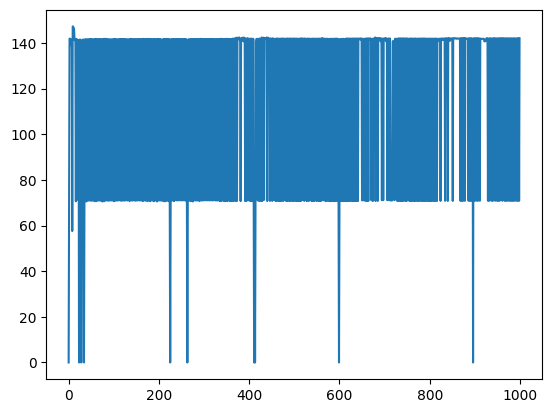

In [10]:
plt.plot(cur_yaml['IBM'].values())